<a href="https://colab.research.google.com/github/JoseHelioF/Avaliacao/blob/master/NoticiasDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parte I - Aquisição de dados**

#### Referência
#### https://www.youtube.com/watch?v=Zy5sHkr5W7s&t=22s&ab_channel=Stack

### **Captura de notícias no site G1 para compor um dataset de estudos**

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
lista_noticias=[]
lista_categoria=[]

### **Função para fazer o loop dentros das peginas recolhendo os textos**

In [2]:
def topicos(base,var,cont):
    nPag=1000
    
    paginas = (i for i in range(1,nPag))
   
    for pagina in paginas:
        
        fim=f'/index/feed/pagina-{pagina}.ghtml'
        endereco=base+var+fim
        response=requests.get(endereco)
        content=response.content
        #Armazena como HTML
        site=BeautifulSoup(content,'html.parser')
        #Separa as notícias atravez da tag html
        noticias=site.findAll('div',attrs={'class':'feed-post bstn-item-shape type-materia'})
        print(pagina,"{}%".format(round(((pagina+1)/nPag)*100)),"{}%".format(round(((cont+1)/len(Topico_var))*100)),var)
        for noticia in noticias:
            lista_noticias.append(noticia.text)
            lista_categoria.append(var)

### **Variaveis para gerar as categoria da base de notícias**

In [3]:
base = 'https://g1.globo.com/'
# Topico_var=['ciencia','inovacao']
Topico_var=['economia','ciencia','economia/agronegocios',
           'carnaval/2022','educacao','empreendedorismo',
           'inovacao','loterias','meio-ambiente','saude',
           'tecnologia','pop-arte','trabalho-e-carreira',
            'mundo/copa-do-catar','especiais/guia-de-compras',
            'fato-ou-fake','politica/eleicoes/2022']

for var,cont in zip(Topico_var,range(len(Topico_var))):
    topicos(base,var,cont)

A saída de streaming foi truncada nas últimas 5000 linhas.
992 99% 71% pop-arte
993 99% 71% pop-arte
994 100% 71% pop-arte
995 100% 71% pop-arte
996 100% 71% pop-arte
997 100% 71% pop-arte
998 100% 71% pop-arte
999 100% 71% pop-arte
1 0% 76% trabalho-e-carreira
2 0% 76% trabalho-e-carreira
3 0% 76% trabalho-e-carreira
4 0% 76% trabalho-e-carreira
5 1% 76% trabalho-e-carreira
6 1% 76% trabalho-e-carreira
7 1% 76% trabalho-e-carreira
8 1% 76% trabalho-e-carreira
9 1% 76% trabalho-e-carreira
10 1% 76% trabalho-e-carreira
11 1% 76% trabalho-e-carreira
12 1% 76% trabalho-e-carreira
13 1% 76% trabalho-e-carreira
14 2% 76% trabalho-e-carreira
15 2% 76% trabalho-e-carreira
16 2% 76% trabalho-e-carreira
17 2% 76% trabalho-e-carreira
18 2% 76% trabalho-e-carreira
19 2% 76% trabalho-e-carreira
20 2% 76% trabalho-e-carreira
21 2% 76% trabalho-e-carreira
22 2% 76% trabalho-e-carreira
23 2% 76% trabalho-e-carreira
24 2% 76% trabalho-e-carreira
25 3% 76% trabalho-e-carreira
26 3% 76% trabalho-e-carre

### **Integrando categorias e texto no mesmo DataFrame e gerando arquivo**

In [4]:
#Salvando CSV
dfn = pd.DataFrame(lista_noticias, columns=['Textos_da_noticia'])
dfc = pd.DataFrame(lista_categoria, columns=['Categoria'])
df = dfn.join(dfc)
df.to_csv('basenoticia.csv',index_label=None)

### **Faz o download do arquivo para o disco**

In [5]:
from google.colab import files
files.download('basenoticia.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Parte II - Tratando os dados

### **Importando DataFrame do arquivo**

In [122]:
import pandas as pd
d = pd.read_csv('basenoticia.csv',sep=",").iloc[:,1:]
d

,Textos_da_noticia,Categoria
0,"RO fecha semana com 1,2 mil vagas de trabalho...",economia
1,Mercado recebe nomeação de Haddad ao Ministéri...,economia
2,Como cultivar aroeiraConfira cartilha gratuita...,economia
3,Nova Nissan Frontier reúne força e potência e ...,economia
4,O que é CDI?Teste seus conhecimentos sobre o t...,economia
...,...,...
87004,"Derrotado em prévias do PSDB, governador do RS...",politica/eleicoes/2022
87005,"'A gente está num processo de conversar', diz ...",politica/eleicoes/2022
87006,Eleições 2022: os pré-candidatos a presidente ...,politica/eleicoes/2022
87007,Doria vence prévias do PSDB para disputa da Pr...,politica/eleicoes/2022


### **Exploração das categorias no DataFrame**

---



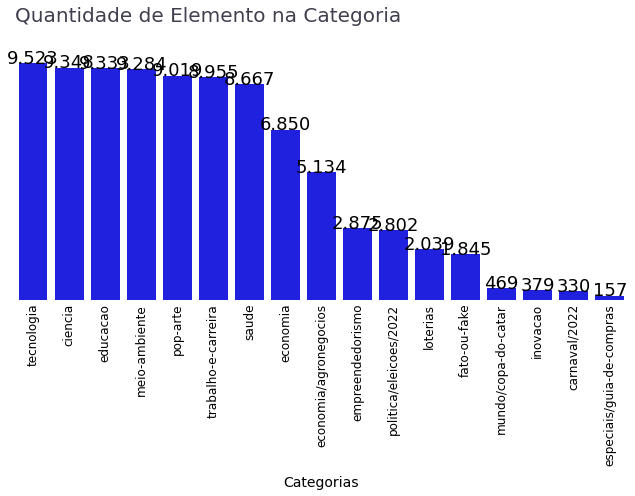

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# d = pd.value_counts(d.Categoria)
dado = pd.DataFrame()
dado['Categoria'] = pd.value_counts(d.Categoria).index
dado['Valor'] = pd.value_counts(d.Categoria).values

fig, ax = plt.subplots(figsize=(9,7))

sns.barplot(x='Categoria',y='Valor',data=dado,ax=ax,palette=['blue'])
ax.set_frame_on(False)
ax.set_title('Quantidade de Elemento na Categoria',loc='left',pad=30,fontdict={'fontsize':20},color='#3f3f4e')
ax.get_yaxis().set_visible(False)
ax.tick_params(axis='x',length=0,labelsize=12,colors='black',rotation = 90)
ax.set_xlabel('Categorias',labelpad=10,fontdict={'fontsize':14},color='black')
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 2,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=18,color='black')
plt.tight_layout();

## Blibliotecas para uso de machine leaning

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
le = LabelEncoder()

### **Configuração do tamanho dos dados que serão usados para o aprendizado e as categorias**

In [125]:
nNoticiaBase = 1800
# catUsada = ['economia','ciencia','economia/agronegocios',
#            'carnaval/2022','educacao','empreendedorismo',
#            'inovacao','loterias','meio-ambiente','saude',
#            'tecnologia','pop-arte','trabalho-e-carreira',
#             'mundo/copa-do-catar','especiais/guia-de-compras',
#             'fato-ou-fake','politica/eleicoes/2022']
catUsada = ['economia','ciencia','economia/agronegocios',
           'educacao','empreendedorismo',
           'loterias','meio-ambiente','saude',
           'tecnologia','pop-arte','trabalho-e-carreira',
           'fato-ou-fake','politica/eleicoes/2022']


dB = d[d.Categoria==catUsada[0]][:nNoticiaBase]
for i in range(1,len(catUsada)):
  dB = pd.concat([dB,d[d.Categoria==catUsada[i]][:nNoticiaBase]],axis = 0)
d = dB

### **Exploração das categorias no DataFrame que está configurado para o treinamento e teste de aprendizagem**


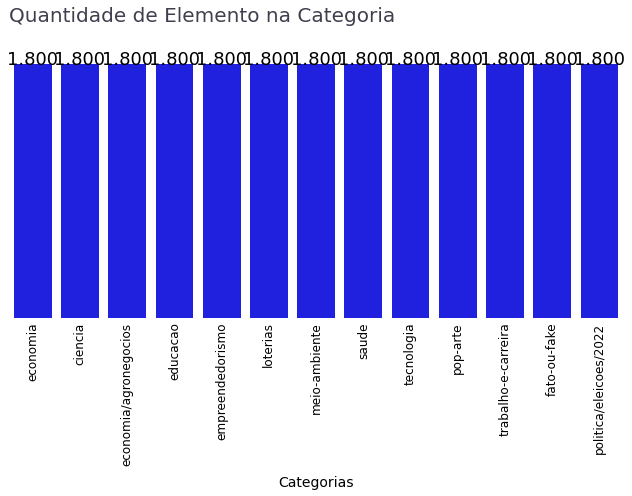

In [126]:
dado = pd.DataFrame()
dado['Categoria'] = pd.value_counts(d.Categoria).index
dado['Valor'] = pd.value_counts(d.Categoria).values

fig, ax = plt.subplots(figsize=(9,7))

sns.barplot(x='Categoria',y='Valor',data=dado,ax=ax,palette=['blue'])
ax.set_frame_on(False)
ax.set_title('Quantidade de Elemento na Categoria',loc='left',pad=30,fontdict={'fontsize':20},color='#3f3f4e')
ax.get_yaxis().set_visible(False)
ax.tick_params(axis='x',length=0,labelsize=12,colors='black',rotation = 90)
ax.set_xlabel('Categorias',labelpad=10,fontdict={'fontsize':14},color='black')
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 2,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=18,color='black')
plt.tight_layout();

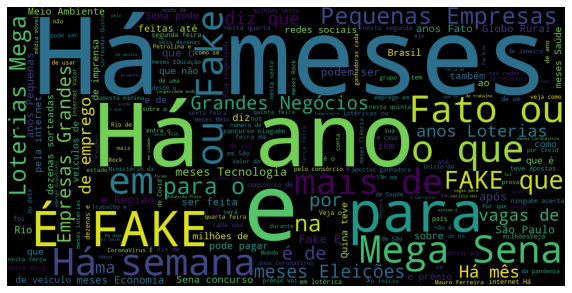

In [127]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
nuvem = " ".join(s for s in d['Textos_da_noticia'])
wordcloud = WordCloud(background_color="black",
                      width=1600, height=800).generate(nuvem)
fig, ax = plt.subplots(figsize=(10,6));
ax.imshow(wordcloud, interpolation='bilinear');
ax.set_axis_off();
plt.imshow(wordcloud);
wordcloud.to_file("Nuvem_Noticias.png")

### **Embaralhamento do Dataframe e separação do em treino e teste. Codificação das categorias**

In [128]:
d = shuffle(d , random_state=2)

df_train = d.iloc[:round(len(d)*0.8),:]
df_test = d.iloc[round(len(d)*0.8):,:]

texto_train = df_train['Textos_da_noticia'].values.tolist()
cat_train = df_train['Categoria']

texto_test = df_test['Textos_da_noticia'].values.tolist()
cat_test = df_test['Categoria']

print(cat_train)

catTansf =le.fit_transform(cat_train)
catTansf

506                    economia
85911    politica/eleicoes/2022
8015                    ciencia
64115                  pop-arte
63781                  pop-arte
                  ...          
65065                  pop-arte
7590                    ciencia
65315                  pop-arte
34502                  loterias
82449              fato-ou-fake
Name: Categoria, Length: 18720, dtype: object


array([1, 8, 0, ..., 9, 6, 5])

### **Fazer a codificação do texto usando TF IDF**

In [129]:
vectorizer = TfidfVectorizer()
X_train_tfidf_vectorize = vectorizer.fit_transform(texto_train)

### **Criando o classificador**

In [130]:
# cfl = SGDClassifier(loss="hinge", penalty='l2',alpha=1e-3,random_state=42,max_iter=5,tol=None)
# cfl = svm.SVC(tol = 1e-3)
cfl = MultinomialNB()
cfl.fit(X_train_tfidf_vectorize,catTansf)

MultinomialNB()

### **Treinando o classificador e fazendo a previsão com a parte teste do Dataframe**

In [131]:
import numpy as np
cat_test = le.transform(cat_test)
vect_transform = vectorizer.transform(texto_test)
predict = cfl.predict(vect_transform)
# cat_test = cat_test.to_numpy().astype(np.int)

class_repor =metrics.classification_report(cat_test,predict)
cm =metrics.confusion_matrix(cat_test,predict)
print(class_repor)
print(cm)

              precision    recall  f1-score   support

           0       0.69      0.62      0.66       348
           1       0.76      0.58      0.66       326
           2       0.82      0.89      0.85       334
           3       0.90      0.93      0.91       361
           4       0.96      0.96      0.96       386
           5       0.96      0.93      0.94       386
           6       1.00      0.99      0.99       371
           7       0.87      0.89      0.88       363
           8       0.86      0.95      0.91       373
           9       0.96      0.93      0.94       348
          10       0.71      0.76      0.73       335
          11       0.84      0.84      0.84       383
          12       0.86      0.94      0.90       366

    accuracy                           0.87      4680
   macro avg       0.86      0.86      0.86      4680
weighted avg       0.86      0.87      0.86      4680

[[217   2   4  11   0   2   0  16   1   1  82  11   1]
 [  1 189  42   7   7   

### Parear código x rotulo da categoria 

In [132]:
listadecat = [i for i in range(len(catUsada))]
listadecatinv = le.inverse_transform(listadecat)
for i,j in zip(listadecat,listadecatinv):
  print(i,'-',j)

0 - ciencia
1 - economia
2 - economia/agronegocios
3 - educacao
4 - empreendedorismo
5 - fato-ou-fake
6 - loterias
7 - meio-ambiente
8 - politica/eleicoes/2022
9 - pop-arte
10 - saude
11 - tecnologia
12 - trabalho-e-carreira


### **Matriz de confusão**

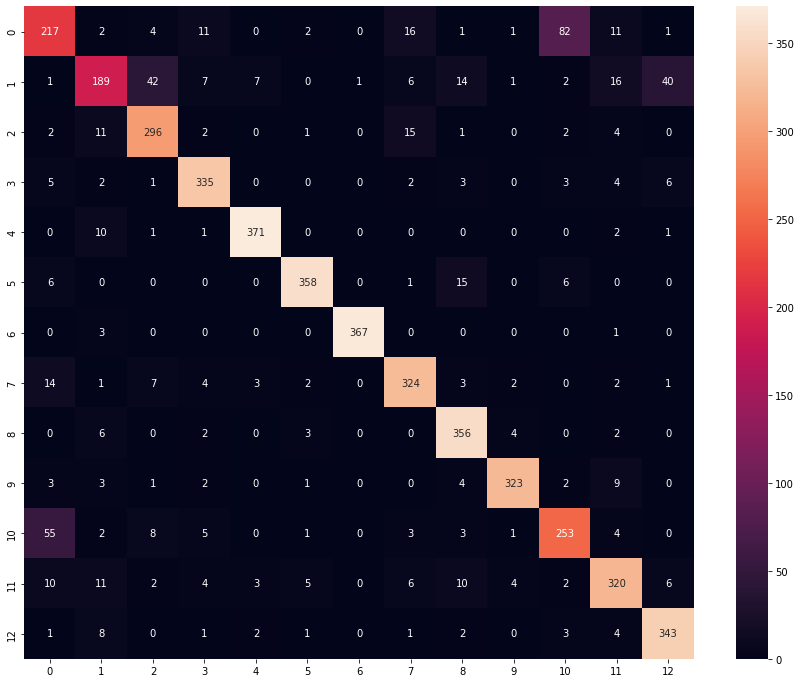

In [133]:
import seaborn as sn
plt.figure(figsize = (15,12))
sn.heatmap(cm, annot=True,fmt='.0f');

### **Usando uma noticia para fazer a previsão e a probabilidade de resposta entre as categorias possiveis**

In [134]:
texto =[ """
Texto prevê estourar teto agroindustria em 198 bi; governo eleito diz ser necessário
 para pagar Auxílio Brasil de  600. Economistas apontam incertezas; senador
  propôs elevar teto em R$ 80 bi."""]
texto = vectorizer.transform(texto)
texto2 =texto
texto = cfl.predict_proba(texto)
print(texto)
texto = cfl.predict(texto2)
print(texto)

[[0.01645728 0.71828564 0.0325524  0.0427624  0.01614343 0.02884754
  0.01262182 0.03487367 0.03211885 0.0112367  0.016874   0.02267202
  0.01455425]]
[1]


### **Total de instância por categoria no teste**

In [135]:
df_test.groupby('Categoria').count()

,Textos_da_noticia
Categoria,
ciencia,348
economia,326
economia/agronegocios,334
educacao,361
empreendedorismo,386
fato-ou-fake,386
loterias,371
meio-ambiente,363
politica/eleicoes/2022,373


### **Importação da biblioteca Natural Language Processing a fim de tratar os textos com funções dessa ferramenta**

In [136]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### **Função com objetivo remover stopwords do texto (palavras que não agrega valor ao texto como preposição e artigos)**

In [137]:
#Remover stopword
def removeStopword(valor):
  stopword = set(nltk.corpus.stopwords.words('portuguese'))
  palavras = [i for i in valor.split() if not i in stopword]
  return (" ".join(palavras))

### Função com objetivo remover desinência das palavras do texto

In [138]:
#Stemming
def stemming(valor):
  stemmer = nltk.stem.RSLPStemmer()
  palavras = []
  for i in valor.split():
    palavras.append(stemmer.stem(i))
  return (" ".join(palavras))

### Função para retirar pontuação

In [139]:
import re
def limpeza_dados(valor):
  valor = re.sub(r"http\S+","",valor.lower().replace(".","").replace(",","").replace(";","").replace("-",""))
  return valor


### Removendo StopWords

In [140]:
p=[]
for i in d['Textos_da_noticia'].to_numpy():
  p.append(removeStopword(i))
d['Textos_da_noticia'] = p
d

,Textos_da_noticia,Categoria
506,"'Compromisso número 1' Lula, combate fome desa...",economia
85911,"Datafolha: Bolsonaro cresce eleitores seguros,...",politica/eleicoes/2022
8015,"Brasil chega 572,7 mil mortes Covid; média móv...",ciencia
64115,Safadão prepara projeto ilha Bahamas logística...,pop-arte
63781,The Weeknd anuncia show extra SP Cantor 'Blind...,pop-arte
...,...,...
1099,"Valores receber: prevista maio, 2ª fase consul...",economia
73679,São Paulo lidera criação vagas formais ano; ve...,trabalho-e-carreira
37286,As mudanças climáticas encolhendo animais?Cien...,meio-ambiente
22899,Abstenção segundo dia provas Enem Alagoas maio...,educacao


### **Radical de palavras**

In [141]:
p=[]
for i in d['Textos_da_noticia'].to_numpy():
  p.append(stemming(i))
d['Textos_da_noticia'] = p
d

,Textos_da_noticia,Categoria
506,"'compromiss númer 1' lula, combat fom desafi s...",economia
85911,"datafolha: bolsonar cresc elei seguros, elei v...",politica/eleicoes/2022
8015,"brasil cheg 572,7 mil mort covid; méd móvel se...",ciencia
64115,safad prepar projet ilh baham logís milionár c...,pop-arte
63781,the weeknd anunc show extr sp can 'blinding li...,pop-arte
...,...,...
1099,"val receber: prev maio, 2ª fas consult seg dat...",economia
73679,são paul lid cri vag formal ano; vej cidad abr...,trabalho-e-carreira
37286,as mudanç climá encolh animais?cient tod mund ...,meio-ambiente
22899,abstenç segund dia prov en alago mai prim dia2...,educacao


### **Contagem de palavra na base de dados**

In [142]:
cont = 0
for i in (d['Textos_da_noticia']):
  cont +=len(i.split())
print("Total de palavras:",cont)

Total de palavras: 657450


### **Refazendo nuvem de palavras**

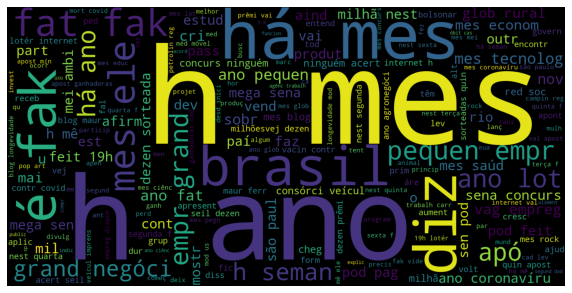

In [143]:
nuvem = " ".join(s for s in d['Textos_da_noticia'])
wordcloud = WordCloud(background_color="black",
                      width=1600, height=800).generate(nuvem)
fig, ax = plt.subplots(figsize=(10,6));
ax.imshow(wordcloud, interpolation='bilinear');
ax.set_axis_off();
plt.imshow(wordcloud);
wordcloud.to_file("Nuvem_Noticias.png")